In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fibermode

In [2]:
# radius = 250e-9
pol = np.pi/2

# Polar coordinates(global)
# rho = radius + 10e-9
phi = pol
phi_deg = phi * 180/np.pi  #[deg]

In [3]:
def linearmode(wavelength, radius, core_index, clad_index, power, pol):
    mode = fibermode.HE(wavelength=wavelength,
                        radius=radius,
                        core_index=core_index,
                        clad_index=clad_index,
                        power=power)
    rho = radius + 1e-9
    Ex = mode.Ex(rho=rho, phi=phi, pol=pol)
    Ey = mode.Ey(rho=rho, phi=phi, pol=pol)
    Ez = mode.Ez(rho=rho, phi=phi, pol=pol)
    return Ex, Ey, Ez

In [4]:
def circmode(wavelength, radius, core_index, clad_index, power):
    ExH, EyH, EzH = linearmode(wavelength=wavelength,
                     radius=radius,
                     core_index=core_index,
                     clad_index=clad_index,
                     power=power,
                     pol=0)
    ExV, EyV, EzV = linearmode(wavelength=wavelength,
                     radius=radius,
                     core_index=core_index,
                     clad_index=clad_index,
                     power=power,
                     pol=np.pi/2)
    
    Ex = (ExH + 1j*ExV) / np.sqrt(2)
    Ey = (EyH + 1j*EyV) / np.sqrt(2)
    Ez = (EzH + 1j*EzV) / np.sqrt(2)
    return Ex, Ey, Ez

In [5]:
def calc_intensity_lin(wavelength, radius):
    Ex, Ey, Ez = linearmode(wavelength=wavelength,
                                    radius=radius,
                                    core_index=1.45,
                                    clad_index=1.0,
                                    power=1e-3,
                                    pol=pol)
    I = np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2
    return I

In [8]:
def calc_intensity_circ(wavelength, radius):
    Ex, Ey, Ez = circmode(wavelength=wavelength,
                                    radius=radius,
                                    core_index=1.45,
                                    clad_index=1.0,
                                    power=1e-3,
                                    )
    I = np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2
    return I

In [40]:
radius = np.linspace(150e-9, 350e-9, 1000)
I660 = []
for i in range(len(radius)):
    I660.append(calc_intensity_lin(wavelength=660e-9, radius=radius[i]))
I660_norm = [(I660[i]-min(I660))/(max(I660)-min(I660)) for i in range(len(I660))]
I785 = []
for i in range(len(radius)):
    I785.append(calc_intensity_lin(wavelength=785e-9, radius=radius[i]))   
I785_norm = [(I785[i]-min(I660))/(max(I660)-min(I660)) for i in range(len(I660))]

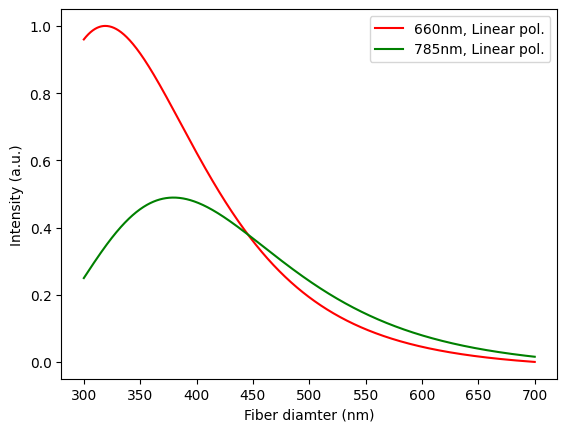

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(radius, I660_norm, color='red', label='660nm, Linear pol.')
ax.plot(radius, I785_norm, color='green', label='785nm, Linear pol.')
ax.set_xticks([1.5e-7, 1.75e-7, 2.0e-7, 2.25e-7, 2.5e-7, 2.75e-7, 3.0e-7, 3.25e-7, 3.5e-7])
ax.set_xticklabels(['300', '350', '400', '450', '500', '550', '600', '650', '700'])
ax.set_xlabel('Fiber diamter (nm)')
ax.set_ylabel('Intensity (a.u.)')
ax.legend()
plt.show()

In [42]:
radius = np.linspace(150e-9, 350e-9, 1000)
I660 = []
for i in range(len(radius)):
    I660.append(calc_intensity_circ(wavelength=660e-9, radius=radius[i]))
I660_norm = [(I660[i]-min(I660))/(max(I660)-min(I660)) for i in range(len(I660))]
I785 = []
for i in range(len(radius)):
    I785.append(calc_intensity_lin(wavelength=785e-9, radius=radius[i]))   
I785_norm = [(I785[i]-min(I660))/(max(I660)-min(I660)) for i in range(len(I660))]

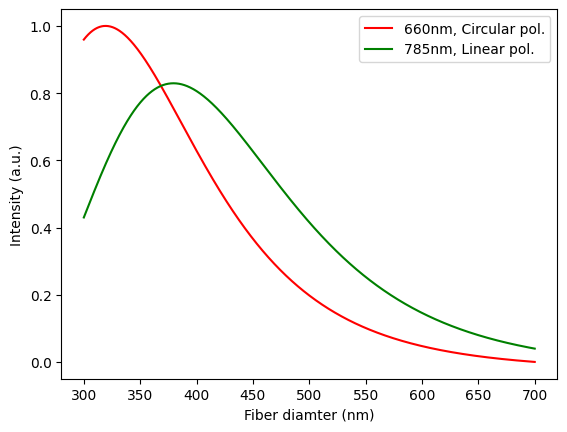

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(radius, I660_norm, color='red', label='660nm, Circular pol.')
ax.plot(radius, I785_norm, color='green', label='785nm, Linear pol.')
ax.set_xticks([1.5e-7, 1.75e-7, 2.0e-7, 2.25e-7, 2.5e-7, 2.75e-7, 3.0e-7, 3.25e-7, 3.5e-7])
ax.set_xticklabels(['300', '350', '400', '450', '500', '550', '600', '650', '700'])
ax.set_xlabel('Fiber diamter (nm)')
ax.set_ylabel('Intensity (a.u.)')
ax.legend()
plt.show()